# 필요 모듈 로딩

In [1]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always') # 이렇게 해주면 항상 warning이 뜸
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd

# 판다스에서 띄우는 float형은 소숫점 2번째까지 뛰웁니다.
pd.options.display.float_format = '{:,.2f}'.format 

# 판다스에서 표시되는 행의 개수는 최대 100개입니다.
# 위에서 50개, 밑에서 50개가 나옵니다.
pd.options.display.max_rows = 100 

pd.options.display.max_columns = 20 # 최대로 표시되는 컬럼의 개수는 20개입니다. 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error

# 필요 함수 및 변수 로딩

In [2]:
import import_ipynb
from FE import feature_engineering
from FE import non_feature_engineering
from FE import datasplit_ts
from FE import datasplit_cs

%store -r raw_all
%store -r raw_nfe
%store -r raw_fe

%store -r X_train
%store -r X_test
%store -r Y_train
%store -r Y_test

importing Jupyter notebook from FE.ipynb
Stored 'raw_all' (DataFrame)
Stored 'raw_nfe' (DataFrame)
Stored 'raw_fe' (DataFrame)
Train_size: (13128, 29) Test_size: (4416, 29)
X_train: (13128, 24) Y_train: (13128, 1)
X_test: (4416, 24) Y_test: (4416, 1)
Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'Y_train' (DataFrame)
Stored 'Y_test' (DataFrame)


# 기초분석 실행

In [3]:
X_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
season,"13,128.00",2.20,1.05,1.00,1.00,2.00,3.00,4.00
holiday,"13,128.00",0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,"13,128.00",0.68,0.46,0.00,0.00,1.00,1.00,1.00
weather,"13,128.00",1.43,0.66,1.00,1.00,1.00,2.00,4.00
temp,"13,128.00",19.66,7.87,0.82,13.12,19.68,26.24,40.18
atemp,"13,128.00",23.04,8.61,0.00,15.91,23.48,30.30,50.00
humidity,"13,128.00",62.48,20.01,0.00,47.00,62.00,79.00,100.00
windspeed,"13,128.00",13.21,8.44,0.00,7.00,13.00,19.00,57.00
count_trend,"13,128.00",166.17,70.75,20.00,111.45,170.60,208.73,356.75
count_seasonal,"13,128.00",0.00,128.50,-181.67,-117.81,21.32,64.69,273.37


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13128 entries, 2011-01-01 00:00:00 to 2012-06-30 23:00:00
Freq: H
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          13128 non-null  int64  
 1   holiday         13128 non-null  int64  
 2   workingday      13128 non-null  int64  
 3   weather         13128 non-null  int64  
 4   temp            13128 non-null  float64
 5   atemp           13128 non-null  float64
 6   humidity        13128 non-null  int64  
 7   windspeed       13128 non-null  float64
 8   count_trend     13128 non-null  float64
 9   count_seasonal  13128 non-null  float64
 10  count_Day       13128 non-null  float64
 11  count_Week      13128 non-null  float64
 12  count_diff      13128 non-null  float64
 13  Year            13128 non-null  int64  
 14  Quater_ver2     13128 non-null  int64  
 15  Month           13128 non-null  int64  
 16  Day             13128 non-null  i

In [5]:
# LinearRegression (using statsmodels)
fit_reg1 = sm.OLS(Y_train, X_train).fit()
fit_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.362e+08
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        12:31:46   Log-Likelihood:                 1906.2
No. Observations:               13128   AIC:                            -3764.
Df Residuals:                   13104   BIC:                            -3585.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
season            -0.0005      0.004     -0.129      0.897      -0.009       0.008
holiday            0.0083      0.014      0.612      0.540      -0.018       0.035
workingday         0.0079      0.007      1.184      0.236      -0.005       0.021
weather            0.0042      0.003      1.232      0.218      -0.003       0.011
temp               0.0022      0.002      1.075      0.282      -0.002       0.006
atemp             -0.0025      0.002     -1.347      0.178      -0.006       0.001
humidity          -0.0001      0.000     -0.845      0.398      -0.000       0.000
windspeed          0.0003      0.000      1.062      0.288      -0.000       0.001
count_trend     9.161e-05   8.57e-05      1.069      0.285   -7.64e-05       0.000
count_seasonal  1.984e-05   2.56e-05      0.775      0.438   -3.03e-05       7e-05
count_Day       4.177e-05   8.36e-05      0.500      0.617      -0.000       0.000
count_Week     -4.345e-05   9.61e-05     -0.452      0.651      -0.000       0.000
count_diff         1.0000    2.9e-05   3.45e+04      0.000       1.000       1.000
Year           -1.547e-05   7.97e-06     -1.939      0.052   -3.11e-05    1.66e-07
Quater_ver2        0.0004      0.002      0.180      0.857      -0.004       0.005
Month              0.0026      0.002      1.051      0.293      -0.002       0.007
Day                0.0004      0.000      1.728      0.084   -4.91e-05       0.001
Hour               0.0006      0.000      1.538      0.124      -0.000       0.001
DayofWeek          0.0003      0.002      0.224      0.823      -0.003       0.003
count_lag1         1.0000    2.7e-05    3.7e+04      0.000       1.000       1.000
count_lag2     -1.926e-05   2.59e-05     -0.744      0.457      -7e-05    3.15e-05
Quater_Dummy_2    -0.0010      0.009     -0.115      0.909      -0.019       0.017
Quater_Dummy_3    -0.0037      0.017     -0.220      0.826      -0.037       0.030
Quater_Dummy_4    -0.0132      0.026     -0.512      0.609      -0.064       0.037
==============================================================================
Omnibus:                    54426.083   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      93552024983.811
Skew:                        -114.255   Prob(JB):                         0.00
Kurtosis:                   13078.751   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
pred_tr_reg1 = fit_reg1.predict(X_train).values
pred_te_reg1 = fit_reg1.predict(X_test).values

In [7]:
pred_tr_reg1

array([ 39.95493987,  39.95523011,  31.95607896, ..., 212.999153  ,
       171.99963612, 151.99961269])

In [8]:
pred_te_reg1 

array([148.97486386,  92.98079744,  89.97770842, ...,  90.02087685,
        61.02007466,  49.01882264])

# 기초분석 Code Summary

In [9]:
# LinearRegression (using statsmodels)
fit_reg1 = sm.OLS(Y_train, X_train).fit()
display(fit_reg1.summary())
pred_tr_reg1 = fit_reg1.predict(X_train).values
pred_te_reg1 = fit_reg1.predict(X_test).values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.362e+08
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        12:33:31   Log-Likelihood:                 1906.2
No. Observations:               13128   AIC:                            -3764.
Df Residuals:                   13104   BIC:                            -3585.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
season            -0.0005      0.004     -0.129      0.897      -0.009       0.008
holiday            0.0083      0.014      0.612      0.540      -0.018       0.035
workingday         0.0079      0.007      1.184      0.236      -0.005       0.021
weather            0.0042      0.003      1.232      0.218      -0.003       0.011
temp               0.0022      0.002      1.075      0.282      -0.002       0.006
atemp             -0.0025      0.002     -1.347      0.178      -0.006       0.001
humidity          -0.0001      0.000     -0.845      0.398      -0.000       0.000
windspeed          0.0003      0.000      1.062      0.288      -0.000       0.001
count_trend     9.161e-05   8.57e-05      1.069      0.285   -7.64e-05       0.000
count_seasonal  1.984e-05   2.56e-05      0.775      0.438   -3.03e-05       7e-05
count_Day       4.177e-05   8.36e-05      0.500      0.617      -0.000       0.000
count_Week     -4.345e-05   9.61e-05     -0.452      0.651      -0.000       0.000
count_diff         1.0000    2.9e-05   3.45e+04      0.000       1.000       1.000
Year           -1.547e-05   7.97e-06     -1.939      0.052   -3.11e-05    1.66e-07
Quater_ver2        0.0004      0.002      0.180      0.857      -0.004       0.005
Month              0.0026      0.002      1.051      0.293      -0.002       0.007
Day                0.0004      0.000      1.728      0.084   -4.91e-05       0.001
Hour               0.0006      0.000      1.538      0.124      -0.000       0.001
DayofWeek          0.0003      0.002      0.224      0.823      -0.003       0.003
count_lag1         1.0000    2.7e-05    3.7e+04      0.000       1.000       1.000
count_lag2     -1.926e-05   2.59e-05     -0.744      0.457      -7e-05    3.15e-05
Quater_Dummy_2    -0.0010      0.009     -0.115      0.909      -0.019       0.017
Quater_Dummy_3    -0.0037      0.017     -0.220      0.826      -0.037       0.030
Quater_Dummy_4    -0.0132      0.026     -0.512      0.609      -0.064       0.037
==============================================================================
Omnibus:                    54426.083   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      93552024983.811
Skew:                        -114.255   Prob(JB):                         0.00
Kurtosis:                   13078.751   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 기초분석 시각화

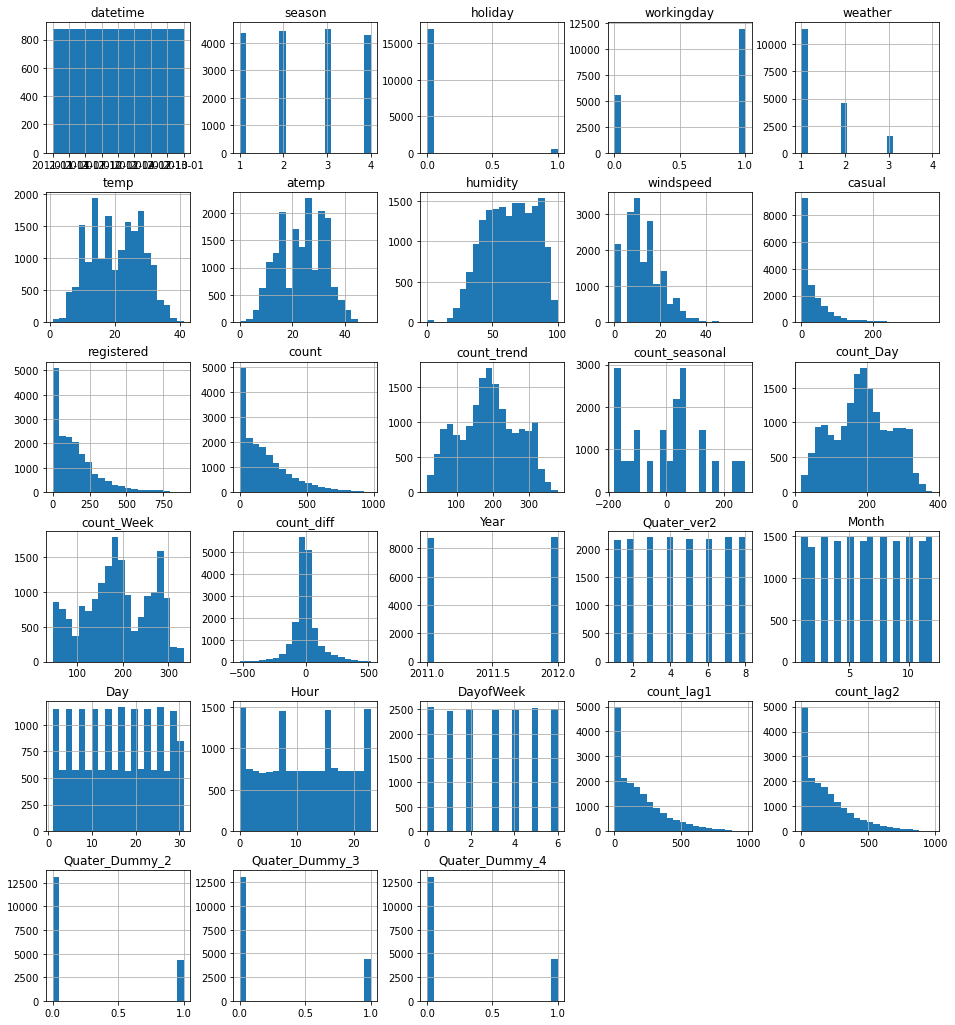

In [12]:
raw_fe.hist(bins = 20, grid = True, figsize =(16,18))
plt.show()

(0.0, 1000.0)

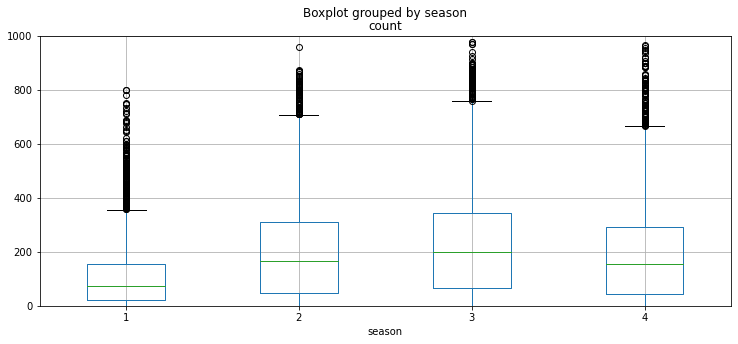

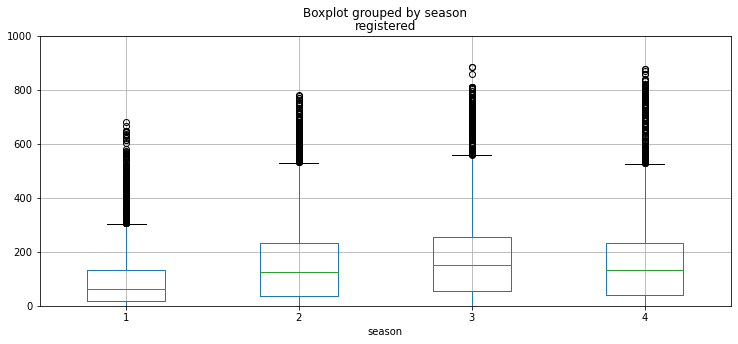

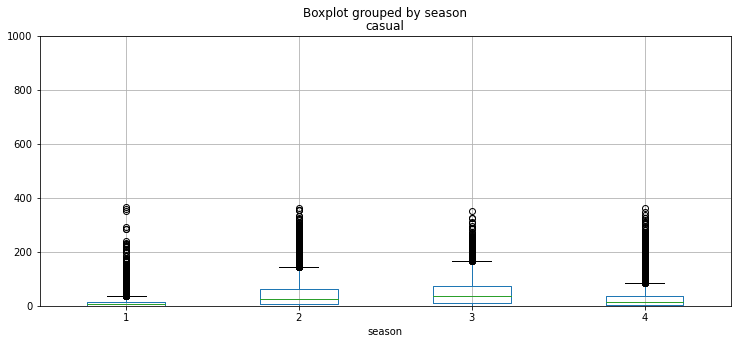

In [22]:
# 여름, 가을에 자전거 수요가 많음을 알 수 있다.
raw_fe.boxplot(column = 'count', by='season', grid = True, figsize=(12,5))
plt.ylim(0,1000)
raw_fe.boxplot(column='registered', by='season', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_fe.boxplot(column='casual', by='season', grid=True, figsize=(12,5))
plt.ylim(0,1000)

(0.0, 1000.0)

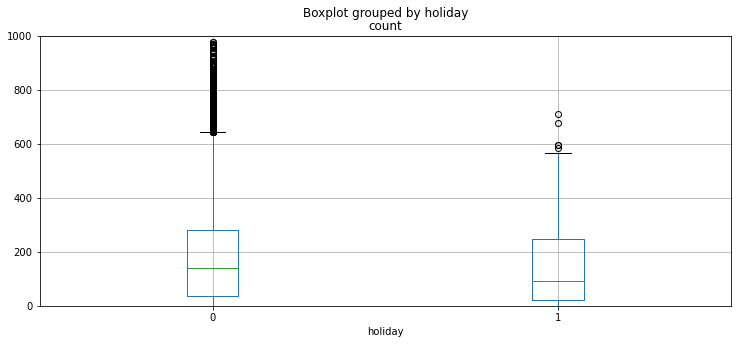

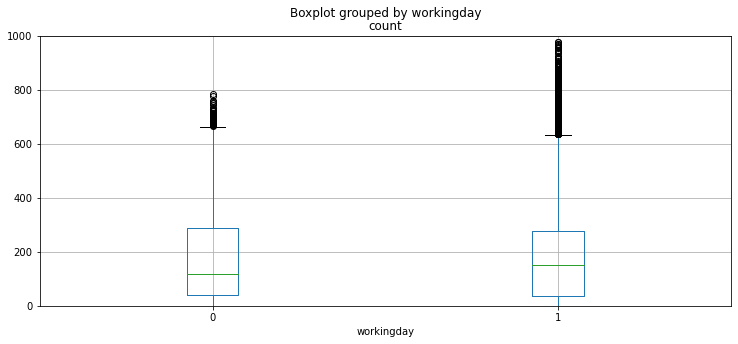

In [24]:
# working day에 자전거 수요가 많음을 알 수 있다.
raw_fe.boxplot(column='count', by='holiday', grid=True, figsize=(12,5))
plt.ylim(0,1000)
raw_fe.boxplot(column='count', by='workingday', grid=True, figsize=(12,5))
plt.ylim(0,1000)

In [26]:
display(raw_all[raw_all.holiday == 0])
display(raw_all[raw_all.holiday == 1])

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119
17375,2012-12-31 20:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89
17376,2012-12-31 21:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90
17377,2012-12-31 22:00,1,0,1,1,10.66,13.63,56,9.00,13,48,61


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
372,2011-01-17 0:00,1,1,0,2,8.20,9.85,47,15.00,1,16,17
373,2011-01-17 1:00,1,1,0,2,8.20,9.85,44,13.00,1,15,16
374,2011-01-17 2:00,1,1,0,2,7.38,8.34,43,17.00,0,8,8
375,2011-01-17 3:00,1,1,0,2,7.38,9.09,43,13.00,0,2,2
376,2011-01-17 4:00,1,1,0,2,7.38,9.85,43,9.00,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
17230,2012-12-25 19:00,1,1,0,2,13.12,15.15,66,15.00,16,20,36
17231,2012-12-25 20:00,1,1,0,2,13.12,15.15,66,19.00,11,29,40
17232,2012-12-25 21:00,1,1,0,2,12.30,14.39,65,13.00,8,26,34
17233,2012-12-25 22:00,1,1,0,2,12.30,15.15,70,11.00,3,16,19


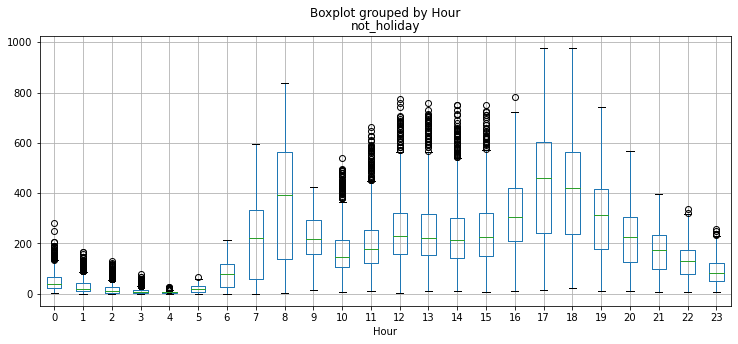

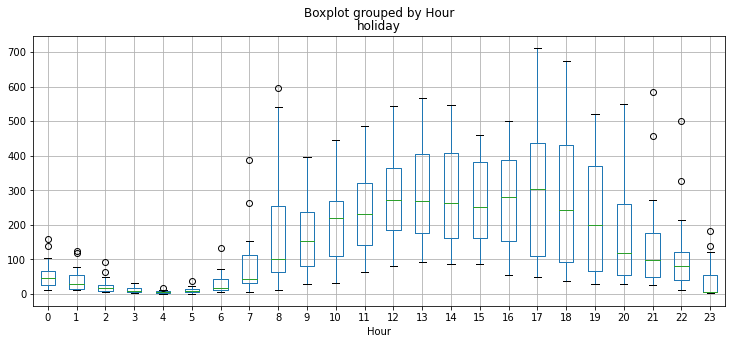

In [35]:
# holiday와 not_holiday의 자전거 수요 피크타임이 다른 것을 box plot으로 확인합니다. 
raw_fe[raw_fe.holiday == 0].boxplot(column = 'count', by = 'Hour', grid = True, figsize = (12,5))
plt.title('not_holiday')
plt.show()
raw_fe[raw_fe.holiday == 1].boxplot(column = 'count', by = 'Hour', grid = True, figsize = (12,5))
plt.title('holiday')
plt.show()

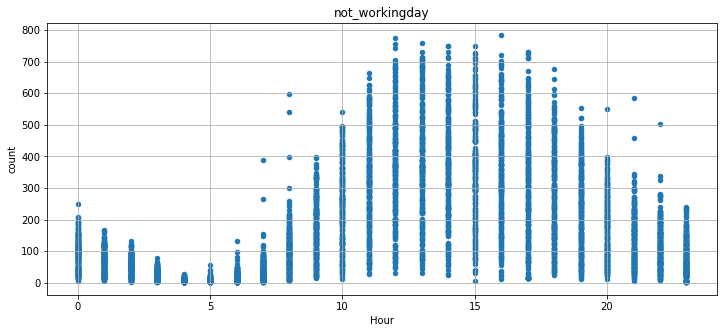

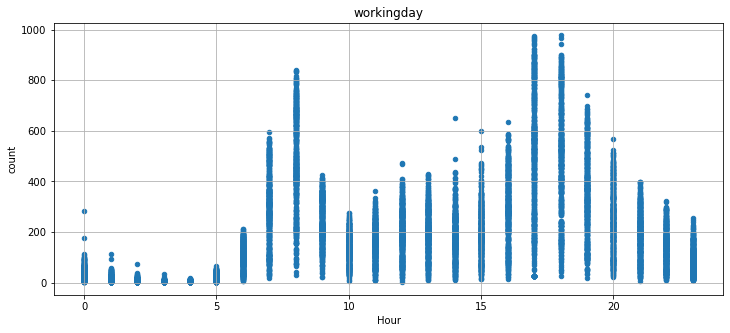

In [36]:
# workingday와 not_workingday의 자전거 수요 피크타임이 다른 것을 scatter plot으로 확인합니다.
raw_fe[raw_fe.workingday == 0].plot.scatter(y='count', x='Hour', grid = True, figsize = (12,5) )
plt.title('not_workingday')
plt.show()
raw_fe[raw_fe.workingday == 1].plot.scatter(y='count', x='Hour', grid = True, figsize = (12,5) )
plt.title('workingday')
plt.show()

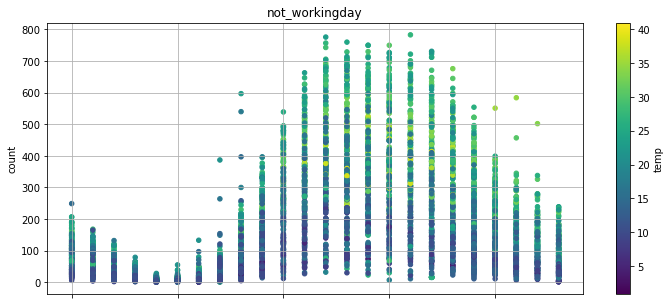

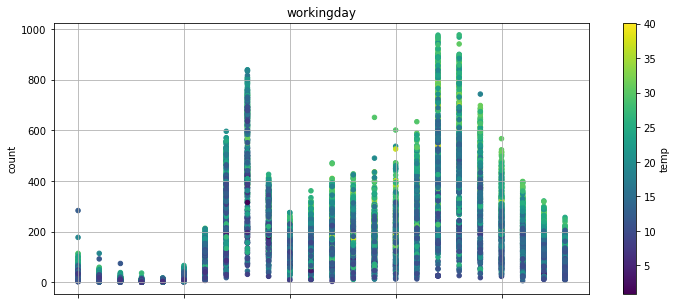

In [43]:
# workingday와 not_workingday의 자전거 수요를 시간대별과 온도별로 알아봅니다.
# 온도가 높을 때 자전거 수요량이 증가합니다.
raw_fe[raw_fe.workingday == 0].plot.scatter(y='count', x='Hour', c='temp', grid = True, figsize = (12,5),  colormap='viridis')
plt.title('not_workingday')
plt.show()

raw_fe[raw_fe.workingday == 1].plot.scatter(y='count', x='Hour', c='temp', grid = True, figsize = (12,5),  colormap='viridis')
plt.title('workingday')
plt.show()

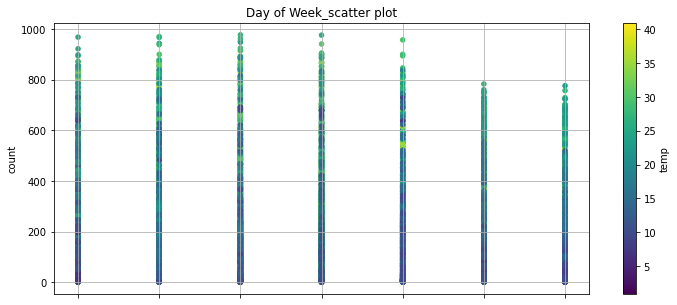

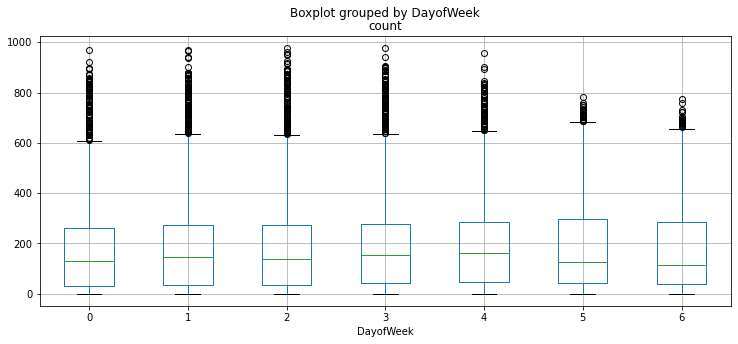

In [45]:
# 요일에 대한 자전거 수요량을 시각화합니다.
raw_fe.plot.scatter(y='count', x='DayofWeek', c='temp', grid = True, figsize = (12,5), colormap = 'viridis')
plt.title('Day of Week_scatter plot')
plt.show()

raw_fe.boxplot(column = 'count', by = 'DayofWeek', grid = True, figsize=(12,5))
plt.show()

(0.0, 1000.0)

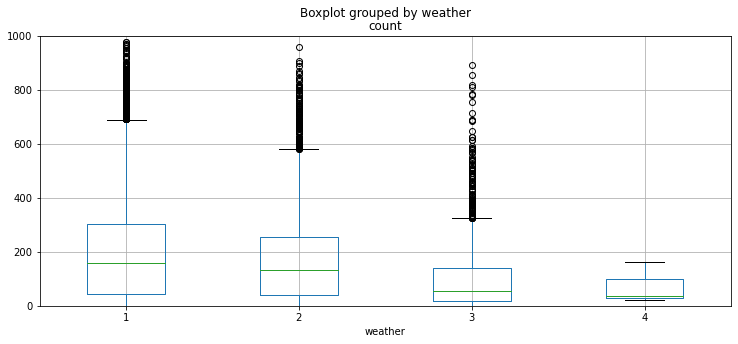

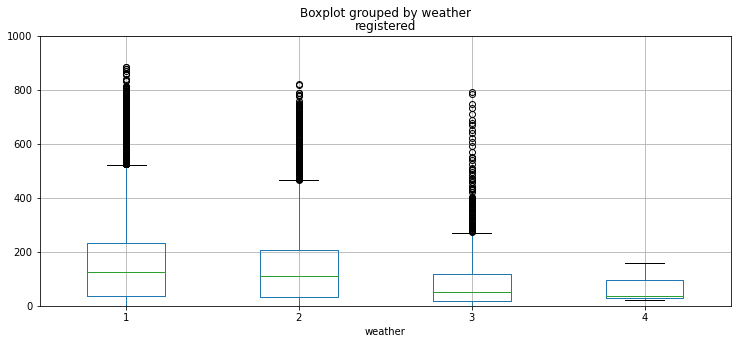

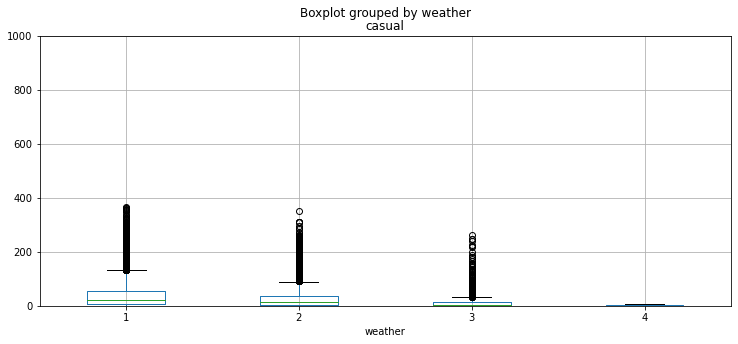

In [47]:
# 날씨에 따른 자전거 수요량을 시각화합니다.
# weather를 1,2,3,4로 분류합니다. 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

raw_fe.boxplot(column = 'count', by = 'weather', grid = True, figsize=(12,5))
plt.ylim(0,1000)
raw_fe.boxplot(column = 'registered', by = 'weather', grid = True, figsize=(12,5))
plt.ylim(0,1000)
raw_fe.boxplot(column = 'casual', by = 'weather', grid = True, figsize=(12,5))
plt.ylim(0,1000)

In [48]:
pd.concat([raw_fe.dtypes, raw_fe.describe(include = 'all').T], axis = 1)

,0,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
datetime,datetime64[ns],17544,17379,2012-10-29 00:00:00,37,2011-01-01,2012-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,int64,"17,544.00",NaN,NaN,NaN,NaT,NaT,2.50,1.11,1.00,2.00,3.00,3.00,4.00
holiday,int64,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.03,0.17,0.00,0.00,0.00,0.00,1.00
workingday,int64,"17,544.00",NaN,NaN,NaN,NaT,NaT,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weather,int64,"17,544.00",NaN,NaN,NaN,NaT,NaT,1.43,0.65,1.00,1.00,1.00,2.00,4.00
temp,float64,"17,544.00",NaN,NaN,NaN,NaT,NaT,20.30,7.92,0.82,13.94,20.50,27.06,41.00
atemp,float64,"17,544.00",NaN,NaN,NaN,NaT,NaT,23.71,8.62,0.00,16.66,24.24,31.06,50.00
humidity,int64,"17,544.00",NaN,NaN,NaN,NaT,NaT,62.87,19.34,0.00,48.00,63.00,79.00,100.00
windspeed,float64,"17,544.00",NaN,NaN,NaN,NaT,NaT,12.81,8.29,0.00,7.00,13.00,17.00,57.00
casual,int64,"17,544.00",NaN,NaN,NaN,NaT,NaT,35.35,49.19,0.00,4.00,16.00,48.00,367.00


In [49]:
raw_fe['weather'].value_counts()

1    11455
2     4563
3     1523
4        3
Name: weather, dtype: int64

In [50]:
raw_fe['weather'].value_counts().sum()

17544

In [51]:
raw_fe['weather'].value_counts()/raw_fe['weather'].value_counts().sum()

1   0.65
2   0.26
3   0.09
4   0.00
Name: weather, dtype: float64

In [52]:
pd.crosstab(index = raw_fe['count'], columns = raw_fe['weather'], margins =True)

weather,1,2,3,4,All
count,,,,,
1,100,45,27,0,172
2,136,59,37,0,232
3,136,66,41,0,243
4,149,62,36,0,247
5,164,63,36,0,263
...,...,...,...,...,...
968,1,0,0,0,1
970,1,0,0,0,1
976,1,0,0,0,1


In [56]:
sub_table = pd.crosstab(index=raw_fe['count'], columns=raw_fe['weather'], margins=True)
sub_table/sub_table.loc['All']*100

weather,1,2,3,4,All
count,,,,,
1,0.87,0.99,1.77,0.00,0.98
2,1.19,1.29,2.43,0.00,1.32
3,1.19,1.45,2.69,0.00,1.39
4,1.30,1.36,2.36,0.00,1.41
5,1.43,1.38,2.36,0.00,1.50
...,...,...,...,...,...
968,0.01,0.00,0.00,0.00,0.01
970,0.01,0.00,0.00,0.00,0.01
976,0.01,0.00,0.00,0.00,0.01


In [58]:
raw_fe.groupby('weather').describe().T

weather                      1        2        3    4
season         count 11,455.00 4,563.00 1,523.00 3.00
               mean       2.51     2.49     2.45 1.00
               std        1.09     1.15     1.16 0.00
               min        1.00     1.00     1.00 1.00
               25%        2.00     1.00     1.00 1.00
...                        ...      ...      ...  ...
Quater_Dummy_4 min        0.00     0.00     0.00 0.00
               25%        0.00     0.00     0.00 0.00
               50%        0.00     0.00     0.00 0.00
               75%        0.00     1.00     1.00 0.00
               max        1.00     1.00     1.00 0.00

[208 rows x 4 columns]

In [59]:
raw_fe.groupby(['weather', 'DayofWeek']).count()

datetime  season  holiday  workingday  temp  atemp  \
weather DayofWeek                                                       
1       0              1594    1594     1594        1594  1594   1594   
        1              1527    1527     1527        1527  1527   1527   
        2              1577    1577     1577        1577  1577   1577   
        3              1660    1660     1660        1660  1660   1660   
        4              1649    1649     1649        1649  1649   1649   
        5              1676    1676     1676        1676  1676   1676   
        6              1772    1772     1772        1772  1772   1772   
2       0               728     728      728         728   728    728   
        1               699     699      699         699   699    699   
        2               615     615      615         615   615    615   
        3               637     637      637         637   637    637   
        4               664     664      664         664   664    664   
        5               649     649      649         649   649    649   
        6               571     571      571         571   571    571   
3       0               228     228      228         228   228    228   
        1               239     239      239         239   239    239   
        2               319     319      319         319   319    319   
        3               183     183      183         183   183    183   
        4               183     183      183         183   183    183   
        5               201     201      201         201   201    201   
        6               170     170      170         170   170    170   
4       0                 1       1        1           1     1      1   
        2                 1       1        1           1     1      1   
        5                 1       1        1           1     1      1   

                   humidity  windspeed  casual  registered  ...  Year  \
weather DayofWeek                                           ...         
1       0              1594       1594    1594        1594  ...  1594   
        1              1527       1527    1527        1527  ...  1527   
        2              1577       1577    1577        1577  ...  1577   
        3              1660       1660    1660        1660  ...  1660   
        4              1649       1649    1649        1649  ...  1649   
        5              1676       1676    1676        1676  ...  1676   
        6              1772       1772    1772        1772  ...  1772   
2       0               728        728     728         728  ...   728   
        1               699        699     699         699  ...   699   
        2               615        615     615         615  ...   615   
        3               637        637     637         637  ...   637   
        4               664        664     664         664  ...   664   
        5               649        649     649         649  ...   649   
        6               571        571     571         571  ...   571   
3       0               228        228     228         228  ...   228   
        1               239        239     239         239  ...   239   
        2               319        319     319         319  ...   319   
        3               183        183     183         183  ...   183   
        4               183        183     183         183  ...   183   
        5               201        201     201         201  ...   201   
        6               170        170     170         170  ...   170   
4       0                 1          1       1           1  ...     1   
        2                 1          1       1           1  ...     1   
        5                 1          1       1           1  ...     1   

                   Quater_ver2  Month   Day  Hour  count_lag1  count_lag2  \
weather DayofWeek                                                           
1       0                 1594   1594  1594  1594        1594      

In [60]:
raw_fe.groupby(['weather', 'DayofWeek']).describe()

season                                     holiday       \
                     count mean  std  min  25%  50%  75%  max    count mean   
weather DayofWeek                                                             
1       0         1,594.00 2.45 1.09 1.00 1.00 2.00 3.00 4.00 1,594.00 0.14   
        1         1,527.00 2.48 1.07 1.00 2.00 3.00 3.00 4.00 1,527.00 0.00   
        2         1,577.00 2.50 1.06 1.00 2.00 3.00 3.00 4.00 1,577.00 0.01   
        3         1,660.00 2.53 1.06 1.00 2.00 3.00 3.00 4.00 1,660.00 0.03   
        4         1,649.00 2.56 1.08 1.00 2.00 3.00 4.00 4.00 1,649.00 0.03   
        5         1,676.00 2.52 1.12 1.00 2.00 3.00 4.00 4.00 1,676.00 0.00   
        6         1,772.00 2.50 1.12 1.00 1.00 3.00 3.00 4.00 1,772.00 0.00   
2       0           728.00 2.59 1.14 1.00 2.00 3.00 4.00 4.00   728.00 0.16   
        1           699.00 2.51 1.17 1.00 1.00 2.00 4.00 4.00   699.00 0.02   
        2           615.00 2.56 1.15 1.00 2.00 2.00 4.00 4.00   615.00 0.00   
        3           637.00 2.54 1.17 1.00 1.00 3.00 4.00 4.00   637.00 0.00   
        4           664.00 2.38 1.17 1.00 1.00 2.00 3.00 4.00   664.00 0.01   
        5           649.00 2.41 1.12 1.00 1.00 2.00 3.00 4.00   649.00 0.00   
        6           571.00 2.41 1.15 1.00 1.00 2.00 4.00 4.00   571.00 0.00   
3       0           228.00 2.48 1.23 1.00 1.00 2.00 4.00 4.00   228.00 0.17   
        1           239.00 2.82 1.10 1.00 2.00 3.00 4.00 4.00   239.00 0.00   
        2           319.00 2.34 1.21 1.00 1.00 2.00 4.00 4.00   319.00 0.00   
        3           183.00 2.33 1.20 1.00 1.00 2.00 3.50 4.00   183.00 0.00   
        4           183.00 2.26 1.08 1.00 1.00 2.00 3.00 4.00   183.00 0.00   
        5           201.00 2.31 1.04 1.00 1.00 2.00 3.00 4.00   201.00 0.00   
        6           170.00 2.62 1.08 1.00 2.00 3.00 4.00 4.00   170.00 0.00   
4       0             1.00 1.00  NaN 1.00 1.00 1.00 1.00 1.00     1.00 0.00   
        2             1.00 1.00  NaN 1.00 1.00 1.00 1.00 1.00     1.00 0.00   
        5             1.00 1.00  NaN 1.00 1.00 1.00 1.00 1.00     1.00 0.00   

                   ... Quater_Dummy_3      Quater_Dummy_4                      \
                   ...            75%  max          count mean  std  min  25%   
weather DayofWeek  ...                                                          
1       0          ...           1.00 1.00       1,594.00 0.22 0.42 0.00 0.00   
        1          ...           1.00 1.00       1,527.00 0.20 0.40 0.00 0.00   
        2          ...           1.00 1.00       1,577.00 0.20 0.40 0.00 0.00   
        3          ...           1.00 1.00       1,660.00 0.22 0.42 0.00 0.00   
        4          ...           1.00 1.00       1,649.00 0.26 0.44 0.00 0.00   
        5          ...           0.00 1.00       1,676.00 0.27 0.44 0.00 0.00   
        6          ...           1.00 1.00       1,772.00 0.25 0.43 0.00 0.00   
2       0          ...           0.00 1.00         728.00 0.30 0.46 0.00 0.00   
        1          ...           0.00 1.00         699.00 0.31 0.46 0.00 0.00   
        2          ...           0.00 1.00         615.00 0.33 0.47 0.00 0.00   
        3          ...           0.00 1.00         637.00 0.33 0.47 0.00 0.00   
        4          ...           1.00 1.00         664.00 0.25 0.43 0.00 0.00   
        5          ...           0.00 1.00         649.00 0.25 0.43 0.00 0.00   
        6          ...           0.00 1.00         571.00 0.25 0.43 0.00 0.00   
3       0          ...           0.00 1.00         228.00 0.37 0.48 0.00 0.00   
        1          ...           0.00 1.00         239.00 0.40 0.49 0.00 0.00   
        2          ...           0.00 1.00         319.00 0.31 0.46 0.00 0.00   
        3          ...           0.00 1.00         183.00 0.27 0.44 0.00 0.00   
        4          ...           1.00 1.00         183.00 0.14 0.34 0.00 0.00   
        5          ...           1.00 1.00         201.00 0.17 0.38 0.00 0.00   
        6          ... 

In [62]:
raw_fe.groupby(['weather', 'DayofWeek']).agg({'count' : [sum, min, max]})

count          
                      sum  min  max
weather DayofWeek                  
1       0          303551    1  968
        1          326993    1  970
        2          328285    1  977
        3          354852    1  976
        4          333333    1  900
        5          347684    1  760
        6          343702    1  776
2       0          131892    1  842
        1          114330    1  868
        2          113142    1  862
        3          112093    1  905
        4          132976    1  957
        5          110816    1  783
        6           80765    1  626
3       0           20827    1  856
        1           27837    1  819
        2           32218    1  891
        3           18477    1  689
        4           21500    1  565
        5           19498    1  584
        6           19683    1  626
4       0             164  164  164
        2              36   36   36
        5              23   23   23

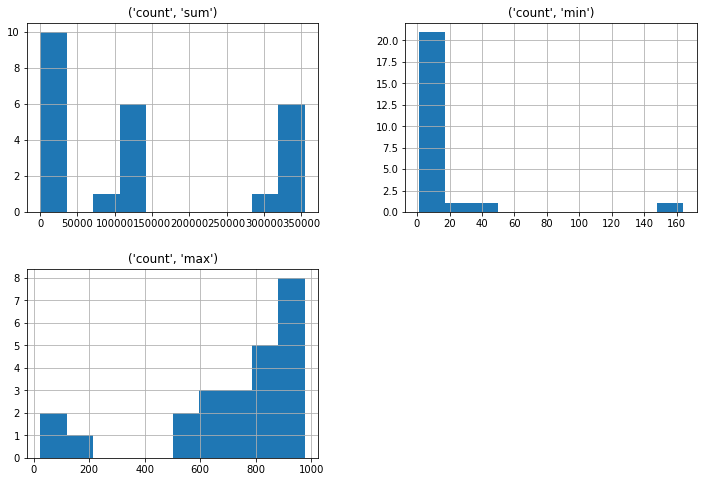

In [63]:
raw_fe.groupby(['weather', 'DayofWeek']).agg({'count':[sum, min, max]}).hist(grid = True, figsize = (12,8))
plt.show()

In [64]:
raw_fe.groupby('weather').groups.items()

dict_items([(1, DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 06:00:00',
               '2011-01-01 07:00:00', '2011-01-01 08:00:00',
               '2011-01-01 09:00:00', '2011-01-01 10:00:00',
               ...
               '2012-12-31 02:00:00', '2012-12-31 03:00:00',
               '2012-12-31 04:00:00', '2012-12-31 05:00:00',
               '2012-12-31 06:00:00', '2012-12-31 07:00:00',
               '2012-12-31 08:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=11455, freq=None)), (2, DatetimeIndex(['2011-01-01 05:00:00', '2011-01-01 13:00:00',
               '2011-01-01 14:00:00', '2011-01-01 15:00:00',
               '2011-01-01 16:00:00', '2011-01-01 17:00:00',
               '2011-01-01 20:00:00', '2011-01-01 21:00:00',
               '2011-01-

In [67]:
for key, item in raw_fe.groupby('weather'):
    display(key, item)
    display(raw_fe.groupby('weather').get_group(key).head())

1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,1,1,0,5,16.00,16.00,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,1,1,5,16.00,16.00,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,1,1,2,5,40.00,16.00,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,1,1,3,5,32.00,40.00,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,1,1,4,5,13.00,32.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 07:00:00,2012-12-31 07:00:00,1,0,1,1,6.56,9.09,64,9.00,2,...,8,12,31,7,0,40.00,9.00,0,0,1
2012-12-31 08:00:00,2012-12-31 08:00:00,1,0,1,1,5.74,7.58,69,9.00,9,...,8,12,31,8,0,85.00,40.00,0,0,1
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,...,8,12,31,21,0,89.00,119.00,0,0,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,...,1,1,1,0,5,16.00,16.00,0,0,0
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,...,1,1,1,1,5,16.00,16.00,0,0,0
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,...,1,1,1,2,5,40.00,16.00,0,0,0
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,...,1,1,1,3,5,32.00,40.00,0,0,0
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,...,1,1,1,4,5,13.00,32.00,0,0,0


2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 05:00:00,2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.00,0,...,1,1,1,5,5,1.00,13.00,0,0,0
2011-01-01 13:00:00,2011-01-01 13:00:00,1,0,0,2,18.86,22.73,72,20.00,47,...,1,1,1,13,5,84.00,56.00,0,0,0
2011-01-01 14:00:00,2011-01-01 14:00:00,1,0,0,2,18.86,22.73,72,19.00,35,...,1,1,1,14,5,94.00,84.00,0,0,0
2011-01-01 15:00:00,2011-01-01 15:00:00,1,0,0,2,18.04,21.97,77,20.00,40,...,1,1,1,15,5,106.00,94.00,0,0,0
2011-01-01 16:00:00,2011-01-01 16:00:00,1,0,0,2,17.22,21.21,82,20.00,41,...,1,1,1,16,5,110.00,106.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 16:00:00,2012-12-31 16:00:00,1,0,1,2,10.66,12.88,48,13.00,30,...,8,12,31,16,0,315.00,247.00,0,0,1
2012-12-31 17:00:00,2012-12-31 17:00:00,1,0,1,2,10.66,14.39,48,6.00,14,...,8,12,31,17,0,214.00,315.00,0,0,1
2012-12-31 18:00:00,2012-12-31 18:00:00,1,0,1,2,10.66,13.63,48,9.00,10,...,8,12,31,18,0,164.00,214.00,0,0,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 05:00:00,2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.00,0,...,1,1,1,5,5,1.00,13.00,0,0,0
2011-01-01 13:00:00,2011-01-01 13:00:00,1,0,0,2,18.86,22.73,72,20.00,47,...,1,1,1,13,5,84.00,56.00,0,0,0
2011-01-01 14:00:00,2011-01-01 14:00:00,1,0,0,2,18.86,22.73,72,19.00,35,...,1,1,1,14,5,94.00,84.00,0,0,0
2011-01-01 15:00:00,2011-01-01 15:00:00,1,0,0,2,18.04,21.97,77,20.00,40,...,1,1,1,15,5,106.00,94.00,0,0,0
2011-01-01 16:00:00,2011-01-01 16:00:00,1,0,0,2,17.22,21.21,82,20.00,41,...,1,1,1,16,5,110.00,106.00,0,0,0


3

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 18:00:00,2011-01-01 18:00:00,1,0,0,3,17.22,21.21,88,17.00,9,...,1,1,1,18,5,67.00,93.00,0,0,0
2011-01-01 19:00:00,2011-01-01 19:00:00,1,0,0,3,17.22,21.21,88,17.00,6,...,1,1,1,19,5,35.00,67.00,0,0,0
2011-01-02 06:00:00,2011-01-02 06:00:00,1,0,0,3,17.22,21.21,77,20.00,0,...,1,1,2,6,6,3.00,3.00,0,0,0
2011-01-02 08:00:00,2011-01-02 08:00:00,1,0,0,3,16.40,20.45,71,15.00,0,...,1,1,2,8,6,1.00,2.00,0,0,0
2011-01-02 14:00:00,2011-01-02 14:00:00,1,0,0,3,14.76,17.43,76,13.00,4,...,1,1,2,14,6,75.00,93.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27 01:00:00,2012-12-27 01:00:00,1,0,1,3,9.84,9.85,93,30.00,0,...,8,12,27,1,3,3.00,10.00,0,0,1
2012-12-29 10:00:00,2012-12-29 10:00:00,1,0,0,3,10.66,12.12,81,9.00,6,...,8,12,29,10,5,49.00,44.00,0,0,1
2012-12-29 11:00:00,2012-12-29 11:00:00,1,0,0,3,8.20,12.12,93,6.00,7,...,8,12,29,11,5,41.00,49.00,0,0,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 18:00:00,2011-01-01 18:00:00,1,0,0,3,17.22,21.21,88,17.00,9,...,1,1,1,18,5,67.00,93.00,0,0,0
2011-01-01 19:00:00,2011-01-01 19:00:00,1,0,0,3,17.22,21.21,88,17.00,6,...,1,1,1,19,5,35.00,67.00,0,0,0
2011-01-02 06:00:00,2011-01-02 06:00:00,1,0,0,3,17.22,21.21,77,20.00,0,...,1,1,2,6,6,3.00,3.00,0,0,0
2011-01-02 08:00:00,2011-01-02 08:00:00,1,0,0,3,16.40,20.45,71,15.00,0,...,1,1,2,8,6,1.00,2.00,0,0,0
2011-01-02 14:00:00,2011-01-02 14:00:00,1,0,0,3,14.76,17.43,76,13.00,4,...,1,1,2,14,6,75.00,93.00,0,0,0


4

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-26 16:00:00,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.00,1,...,1,1,26,16,2,43.00,36.00,0,0,0
2012-01-09 18:00:00,2012-01-09 18:00:00,1,0,1,4,8.20,11.37,86,6.00,6,...,5,1,9,18,0,152.00,49.00,0,0,0
2012-01-21 01:00:00,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,13.00,1,...,5,1,21,1,5,24.00,38.00,0,0,0


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
DateTime,,,,,,,,,,,,,,,,,,,,,
2011-01-26 16:00:00,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.00,1,...,1,1,26,16,2,43.00,36.00,0,0,0
2012-01-09 18:00:00,2012-01-09 18:00:00,1,0,1,4,8.20,11.37,86,6.00,6,...,5,1,9,18,0,152.00,49.00,0,0,0
2012-01-21 01:00:00,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,13.00,1,...,5,1,21,1,5,24.00,38.00,0,0,0


In [68]:
# 데이터셋을 온도를 기준으로 10개의 구간으로 나눕니다.
# pd.cut을 이용해 동일한 길이로 나눕니다.
pd.cut(raw_fe['temp'], 10).value_counts()

(24.928, 28.946]    3164
(12.874, 16.892]    2926
(20.91, 24.928]     2687
(16.892, 20.91]     2474
(8.856, 12.874]     2466
(28.946, 32.964]    1976
(4.838, 8.856]      1018
(32.964, 36.982]     625
(0.78, 4.838]        124
(36.982, 41.0]        84
Name: temp, dtype: int64

In [69]:
raw_fe.groupby(pd.cut(raw_fe['temp'], 10)).describe().T

temp                  (0.78, 4.838]  (4.838, 8.856]  (8.856, 12.874]  \
season         count         124.00        1,018.00         2,466.00   
               mean            1.00            1.22             2.02   
               std             0.00            0.75             1.36   
               min             1.00            1.00             1.00   
               25%             1.00            1.00             1.00   
...                             ...             ...              ...   
Quater_Dummy_4 min             0.00            0.00             0.00   
               25%             0.00            0.00             0.00   
               50%             0.00            0.00             0.00   
               75%             0.00            0.00             1.00   
               max             0.00            1.00             1.00   

temp                  (12.874, 16.892]  (16.892, 20.91]  (20.91, 24.928]  \
season         count          2,926.00         2,474.00         2,687.00   
               mean               2.51             2.66             2.71   
               std                1.36             1.21             0.96   
               min                1.00             1.00             1.00   
               25%                1.00             2.00             2.00   
...                                ...              ...              ...   
Quater_Dummy_4 min                0.00             0.00             0.00   
               25%                0.00             0.00             0.00   
               50%                0.00             0.00             0.00   
               75%                1.00             1.00             0.00   
               max                1.00             1.00             1.00   

temp                  (24.928, 28.946]  (28.946, 32.964]  (32.964, 36.982]  \
season         count          3,164.00          1,976.00            625.00   
               mean               2.73              2.80              2.86   
               std                0.65              0.44              0.35   
               min                1.00              1.00              2.00   
               25%                2.00              3.00              3.00   
...                                ...               ...               ...   
Quater_Dummy_4 min                0.00              0.00              0.00   
               25%                0.00              0.00              0.00   
               50%                0.00              0.00              0.00   
               75%                0.00              0.00              0.00   
               max                1.00              1.00              0.00   

temp                  (36.982, 41.0]  
season         count           84.00  
               mean             2.90  
               std              0.30  
               min              2.00  
               25%              3.00  
...                              ...  
Quater_Dummy_4 min              0.00  
               25%              0.00  
               50%              0.00  
               75%              0.00  
               max              0.00  

[216 rows x 10 columns]

<AxesSubplot:xlabel='temp', ylabel='count'>

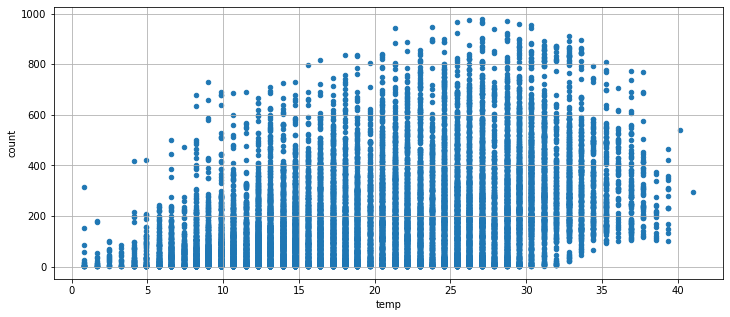

In [70]:
# 온도대별로 자전거 수요량을 시각화합니다.
raw_fe.plot.scatter(y='count', x='temp', grid = True, figsize=(12,5))

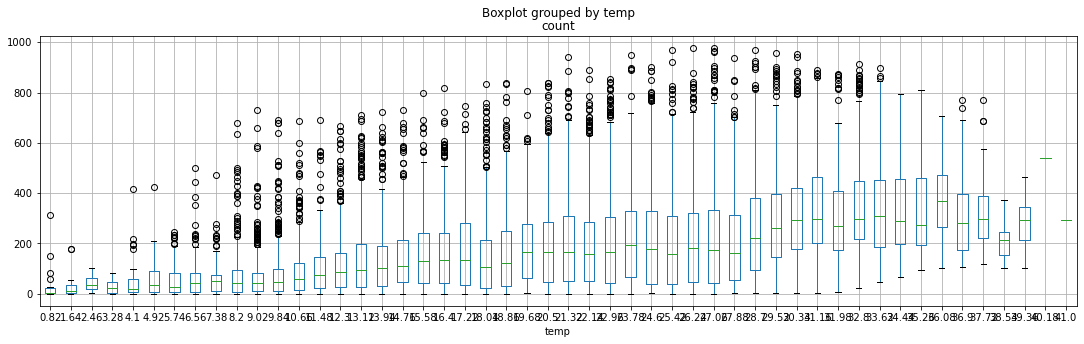

In [73]:
raw_fe.boxplot(column = 'count', by = 'temp', grid = True, figsize=(18,5))
plt.show()

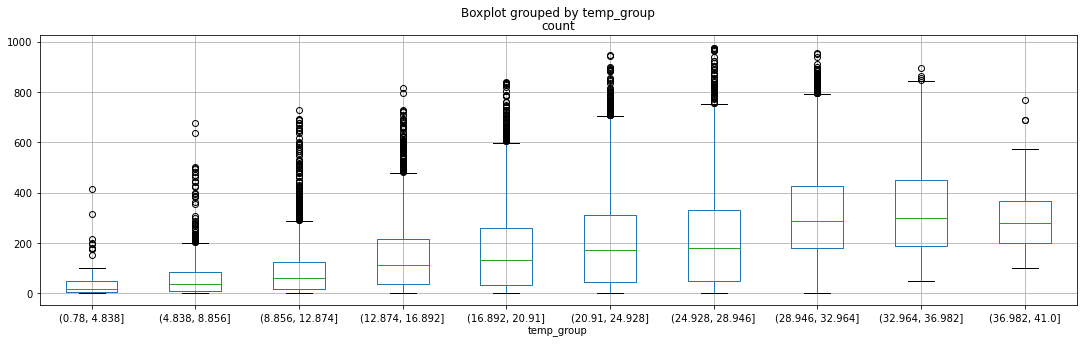

In [76]:
raw_fe.boxplot(column = 'count', by='temp_group', grid = True, figsize=(18,5))
plt.show()

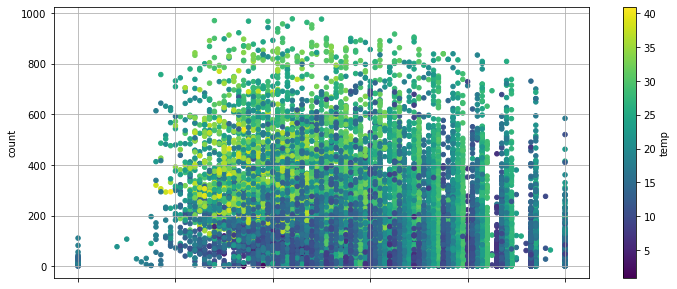

In [77]:
raw_fe.plot.scatter(y='count', x='humidity', c = 'temp', grid = True, figsize=(12,5), colormap = 'viridis')
plt.show()

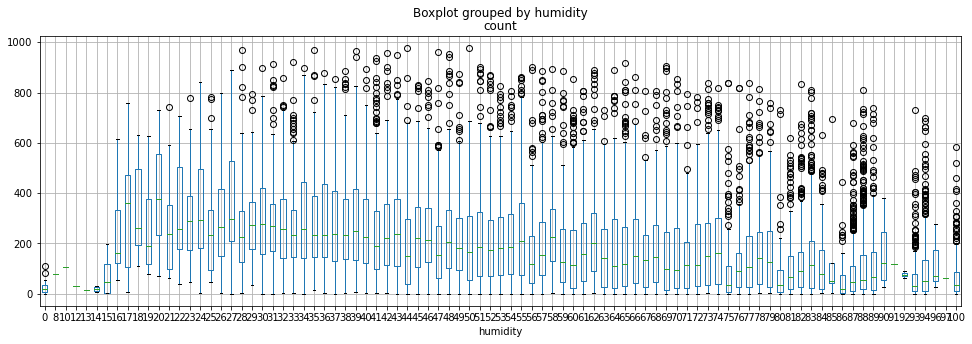

In [79]:
raw_fe.boxplot(column = 'count', by='humidity', grid = True, figsize=(16,5))
plt.show()

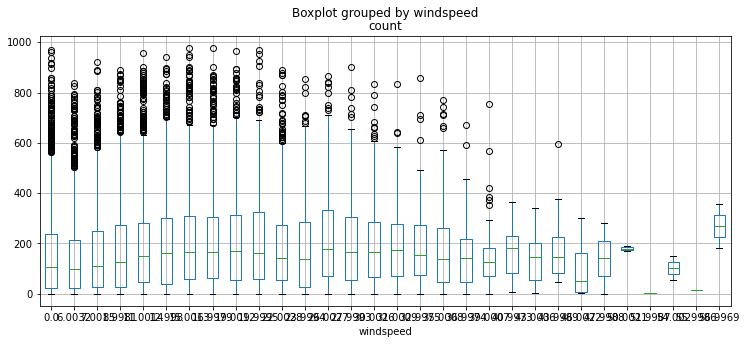

In [80]:
raw_fe.boxplot(column='count', by='windspeed', grid=True, figsize=(12,5))
plt.show()

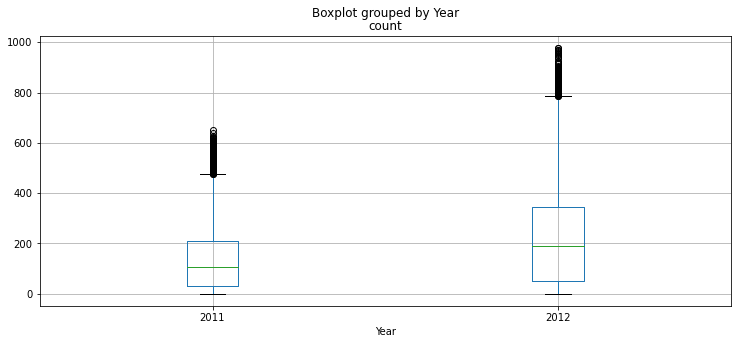

In [84]:
raw_fe.boxplot(column = 'count', by='Year', grid=True, figsize=(12,5))
plt.show()

<AxesSubplot:title={'center':'count'}, xlabel='Month'>

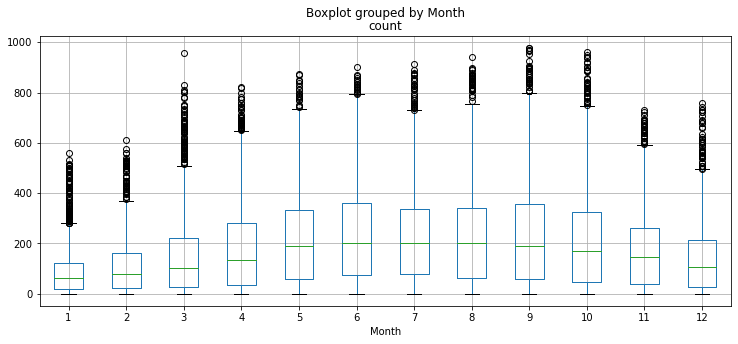

In [85]:
raw_fe.boxplot(column = 'count', by='Month', grid= True, figsize = (12,5))

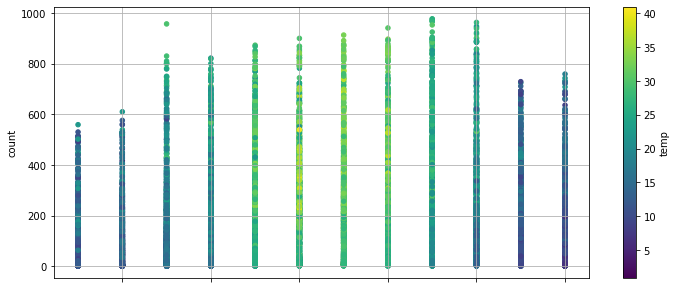

In [86]:
raw_fe.plot.scatter(y='count', x='Month', c='temp', grid=True, figsize=(12,5), colormap='viridis')
plt.show()

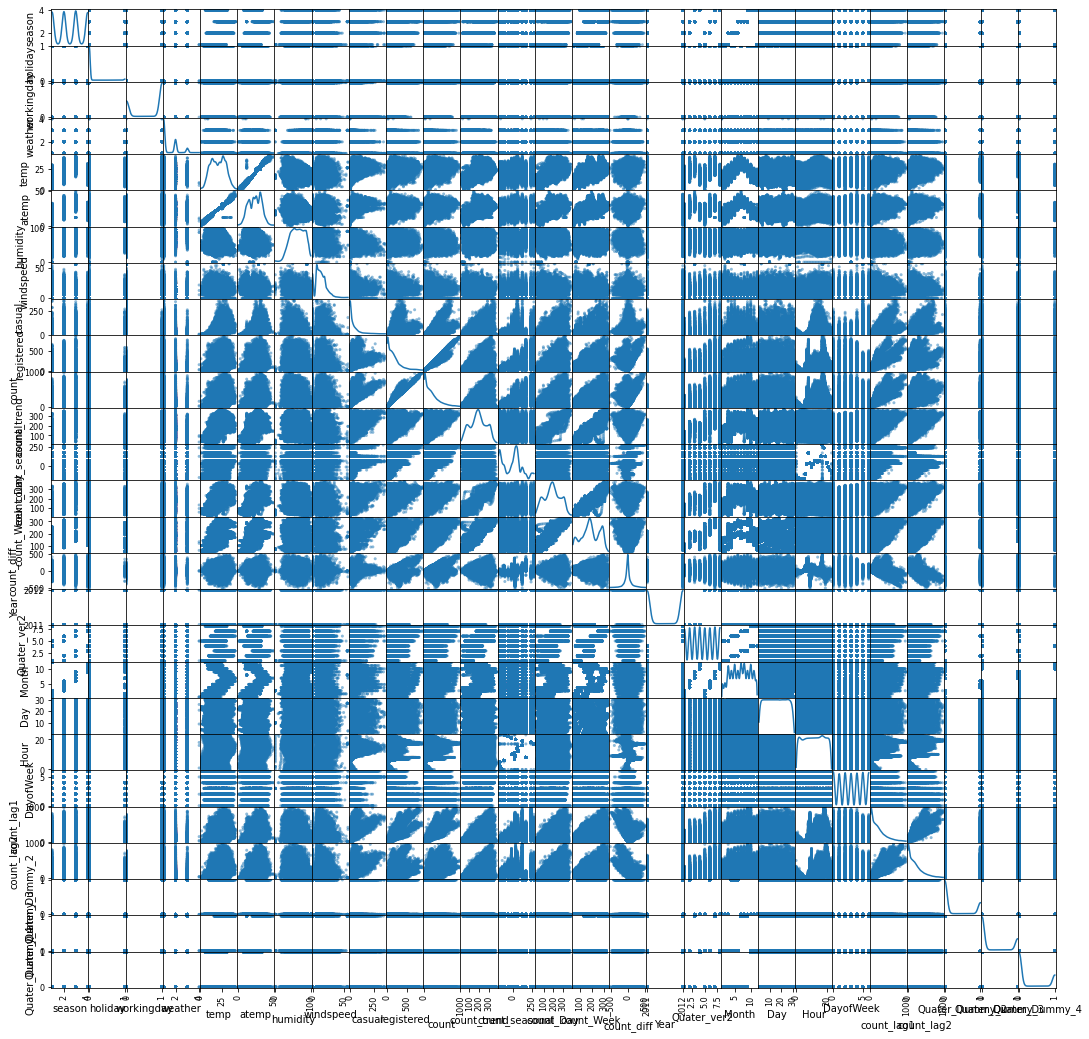

In [90]:
pd.plotting.scatter_matrix(raw_fe, figsize = (18,18), diagonal = 'kde')
plt.show()

In [92]:
raw_fe.corr().style.background_gradient().set_precision(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,Year,Quater_ver2,Month,Day,Hour,DayofWeek,count_lag1,count_lag2,Quater_Dummy_2,Quater_Dummy_3,Quater_Dummy_4
season,1.00,-0.02,0.02,-0.02,0.32,0.33,0.15,-0.14,0.12,0.18,0.18,0.41,-0.00,0.41,0.47,-0.00,-0.00,0.42,0.83,-0.00,-0.01,-0.01,0.18,0.18,-0.20,0.31,0.60
holiday,-0.02,1.00,-0.26,-0.00,-0.04,-0.04,-0.01,0.01,0.03,-0.05,-0.04,-0.08,-0.00,-0.07,-0.04,-0.00,0.00,0.01,0.01,-0.01,0.01,-0.19,-0.04,-0.04,-0.03,-0.03,0.05
workingday,0.02,-0.26,1.00,0.04,0.05,0.05,0.02,-0.02,-0.30,0.13,0.03,0.04,0.00,0.02,0.02,0.01,0.00,-0.00,-0.00,0.01,-0.00,-0.70,0.03,0.02,0.01,0.01,-0.02
weather,-0.02,-0.00,0.04,1.00,-0.11,-0.11,0.43,0.05,-0.16,-0.13,-0.15,-0.25,-0.00,-0.17,-0.07,-0.02,-0.02,-0.02,0.00,0.01,-0.02,-0.06,-0.14,-0.14,-0.03,-0.07,0.05
temp,0.32,-0.04,0.05,-0.11,1.00,0.99,-0.07,-0.02,0.46,0.34,0.41,0.60,0.17,0.61,0.62,-0.00,0.05,0.14,0.21,0.02,0.14,-0.03,0.41,0.40,0.26,0.60,-0.31
atemp,0.33,-0.04,0.05,-0.11,0.99,1.00,-0.06,-0.06,0.46,0.34,0.41,0.61,0.16,0.61,0.62,-0.01,0.05,0.15,0.22,0.02,0.13,-0.03,0.41,0.40,0.27,0.58,-0.29
humidity,0.15,-0.01,0.02,0.43,-0.07,-0.06,1.00,-0.27,-0.35,-0.28,-0.33,-0.09,-0.34,-0.06,0.04,0.00,-0.08,0.00,0.16,0.03,-0.27,-0.04,-0.33,-0.31,-0.03,0.06,0.10
windspeed,-0.14,0.01,-0.02,0.05,-0.02,-0.06,-0.27,1.00,0.08,0.07,0.08,-0.16,0.19,-0.14,-0.10,0.01,-0.01,-0.07,-0.13,0.02,0.14,-0.00,0.08,0.06,0.04,-0.10,-0.06
casual,0.12,0.03,-0.30,-0.16,0.46,0.46,-0.35,0.08,1.00,0.51,0.70,0.39,0.44,0.39,0.34,0.08,0.14,0.16,0.07,-0.01,0.30,0.24,0.65,0.58,0.15,0.17,-0.10
registered,0.18,-0.05,0.13,-0.13,0.34,0.34,-0.28,0.07,0.51,1.00,0.97,0.40,0.71,0.38,0.36,0.31,0.26,0.28,0.13,-0.01,0.37,-0.08,0.80,0.53,0.06,0.13,-0.00


In [95]:
raw_fe.corr().iloc[:, 8:11]

,casual,registered,count
season,0.12,0.18,0.18
holiday,0.03,-0.05,-0.04
workingday,-0.30,0.13,0.03
weather,-0.16,-0.13,-0.15
temp,0.46,0.34,0.41
atemp,0.46,0.34,0.41
humidity,-0.35,-0.28,-0.33
windspeed,0.08,0.07,0.08
casual,1.00,0.51,0.70
registered,0.51,1.00,0.97


In [98]:
raw_fe.corr().loc[:, ['casual', 'registered', 'count']]

,casual,registered,count
season,0.12,0.18,0.18
holiday,0.03,-0.05,-0.04
workingday,-0.30,0.13,0.03
weather,-0.16,-0.13,-0.15
temp,0.46,0.34,0.41
atemp,0.46,0.34,0.41
humidity,-0.35,-0.28,-0.33
windspeed,0.08,0.07,0.08
casual,1.00,0.51,0.70
registered,0.51,1.00,0.97


In [99]:
raw_fe.corr().loc[:, ['casual', 'registered', 'count']].style.background_gradient().set_precision(2).set_properties(**{'font-size': '15pt'})

,casual,registered,count
season,0.12,0.18,0.18
holiday,0.03,-0.05,-0.04
workingday,-0.30,0.13,0.03
weather,-0.16,-0.13,-0.15
temp,0.46,0.34,0.41
atemp,0.46,0.34,0.41
humidity,-0.35,-0.28,-0.33
windspeed,0.08,0.07,0.08
casual,1.00,0.51,0.70
registered,0.51,1.00,0.97
